In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Step 1: Data Collection
data = pd.read_csv(r'C:\Users\Deepak\Downloads\used_car_dataset.csv')


In [4]:
# Step 2: Data Preprocessing
# a. Handling missing values, outliers, and duplicates
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [5]:
# b. Convert categorical variables into numerical representations
data = pd.get_dummies(data, columns=['fuel_type', 'city'])


In [6]:
# c. Normalize or scale numerical features if necessary (optional, depending on the model)
# You can use techniques like Min-Max Scaling or Standard Scaling if necessary

# Preprocess 'kms_driven' column
data['kms_driven'] = data['kms_driven'].str.replace(' km', '').str.replace(',', '').astype(float)


In [7]:
# Updated conversion function to handle Indian Rupee symbol ('₹') and commas
def convert_to_float(price):
    if 'Crore' in price:
        return float(price.replace('₹', '').replace(' Crore', '').replace(',', '')) * 10000000  # 1 Crore = 10,000,000
    elif 'Lakh' in price:
        return float(price.replace('₹', '').replace(' Lakh', '').replace(',', '')) * 100000  # 1 Lakh = 100,000
    elif '₹' in price:
        return float(price.replace('₹', '').replace(',', ''))
    else:
        return float(price.replace(',', ''))

In [8]:
# Preprocess 'car_price_in_rupees' column
data['car_price_in_rupees'] = data['car_price_in_rupees'].apply(convert_to_float)


In [9]:
# Step 3: Feature Engineering
# a. Identify relevant features
# For simplicity, let's assume all features are relevant for now

# b. Create new features
data['age_of_car'] = 2024 - data['year_of_manufacture']


In [10]:
# Step 4: Data Splitting
X = data.drop(['car_price_in_rupees', 'car_name'], axis=1)
y = data['car_price_in_rupees']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Step 5: Model Selection
model = RandomForestRegressor()


In [13]:
# Step 6: Model Training
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# Step 7: Model Evaluation
predictions = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)

In [16]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 699928.2099917287
Mean Squared Error: 1896914577918.6975
Root Mean Squared Error: 1377285.220249857
R-squared Score: 0.11144928532197629


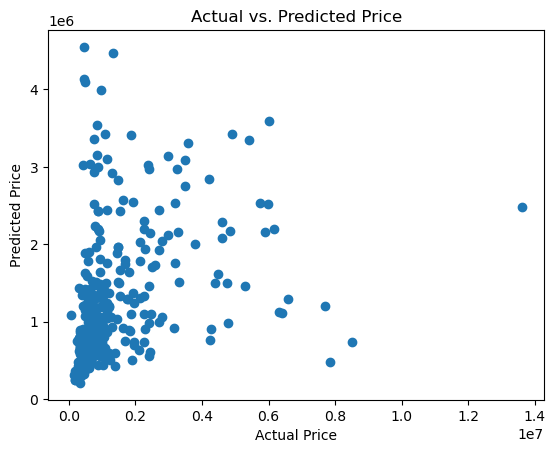

In [17]:
# Step 8: Visualization (optional)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()


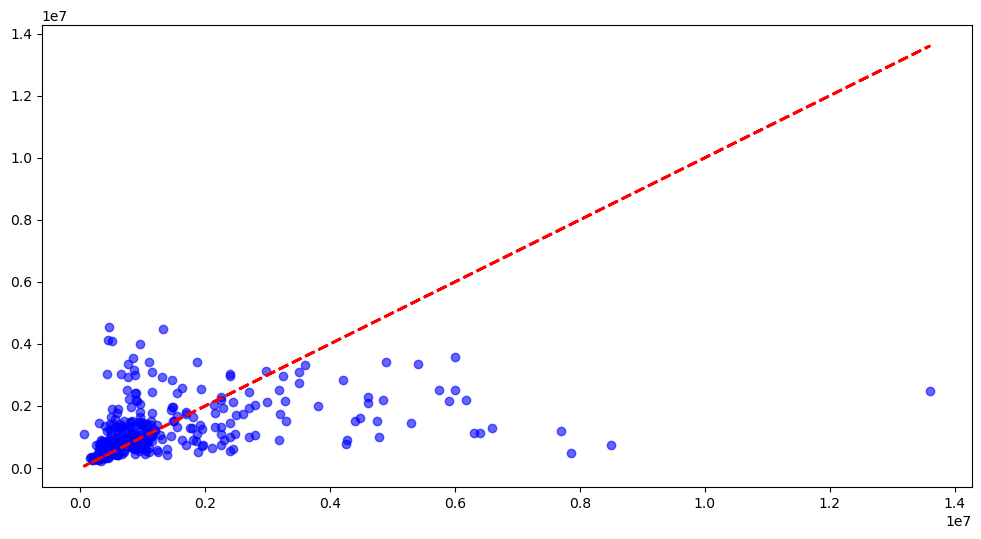

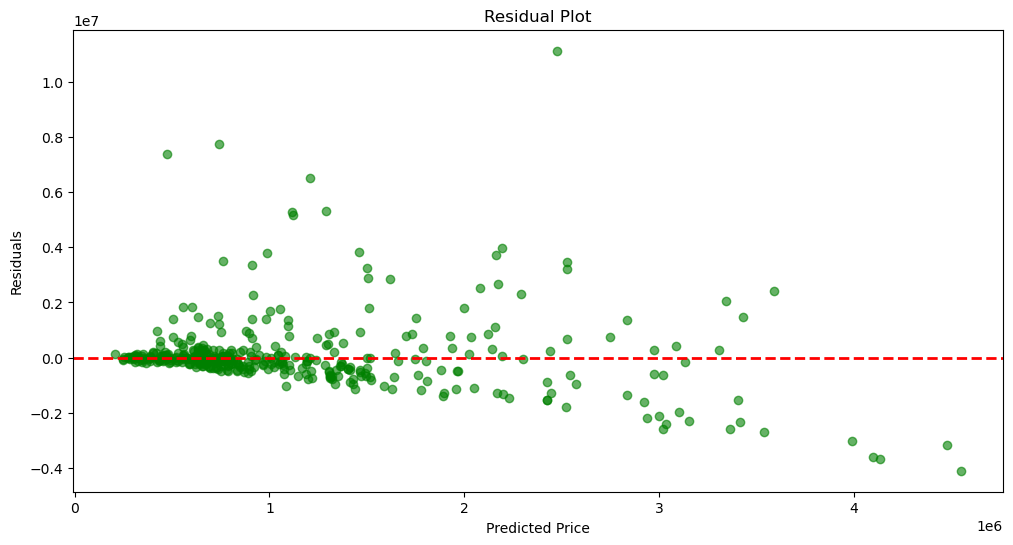

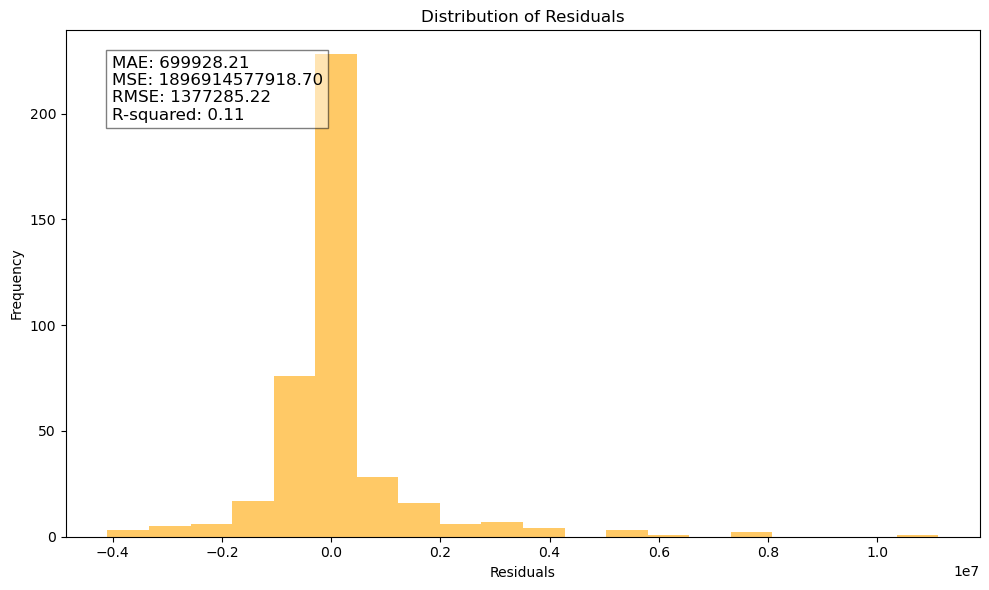

In [18]:
# Calculate residuals
residuals = y_test - predictions

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label='Data')
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Residuals plot
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

# Distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='orange', alpha=0.6)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Evaluation metrics
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR-squared: {r2:.2f}', 
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()